In [5]:
from template_pietro import Spade
import numpy as np
from sklearn import tree, metrics
import pandas as pd
import copy
import random

In [1]:

def convert_dict_to_np_array(patterns_in_trans, min_neg_trans_id):
    """
    Convert a dictionary of patterns to a NumPy array where each row represents a transaction and each column represents a pattern.
    """
    # Get all unique transactions: 
    all_transactions_id = set()
    for transactions in patterns_in_trans.values():
        all_transactions_id.update(transactions)

    nb_pos = sum ([i<min_neg_trans_id for i in all_transactions_id])    
    nb_neg = len(all_transactions_id)-nb_pos
    num_transactions = len(all_transactions_id)

    # Create an empty NumPy array with dimensions (number of transactions, number of unique patterns)
    num_patterns = len(patterns_in_trans)
    X = np.zeros((num_transactions, num_patterns))

    # Create a mapping from pattern to column index in the array
    pattern_to_col_index = {pattern: i for i, pattern in enumerate(patterns_in_trans.keys())}

    # Iterate over each pattern and its associated transactions
    for pattern, transactions in patterns_in_trans.items():
        col_index = pattern_to_col_index[pattern]
        for transaction_id in transactions:
            row_index = list(all_transactions_id).index(transaction_id)
            X[row_index, col_index] = 1

    y = np.concatenate([np.ones(nb_pos), np.zeros(nb_neg)])

    return (X, y, nb_pos, nb_neg)


In [2]:

# taken from petro gavazzi code from machine learning regression and evaluation
def evaluate_accuracies(X, y, model, nb_folds):
    
    n_samples = len(X)

    fold_indices = np.arange(n_samples)
    random.shuffle(fold_indices)
    fold_indices = np.array_split(fold_indices, nb_folds)
    
    accuracies = []

    for i in range(10):

        val_indices = fold_indices[i]
        val_X, val_y = X[val_indices], y[val_indices]
        
        train_indices = np.concatenate([fold_indices[j] for j in range(10) if j != i])
        train_X, train_y = X[train_indices], y[train_indices]
        
        model.fit(train_X, train_y)
        
        val_acc = model.score(val_X, val_y)
        accuracies.append(val_acc)

    cv_acc = np.mean(accuracies)
    cv_acc_std = np.std(accuracies)
    return cv_acc, cv_acc_std





# Spade and supervised algo

## Accuracy as a function of k



In [5]:

# Subsequently, you will use the Scikit-learn library to train a model based on the top-k patterns found using the sequence mining algorithms developed in the previous 2 steps. 
# Here, we will use decision trees such as implemented in Scikit-learn.
# Scikit-learn allows to tune thesearch tree using multiple parameters. 
# Please leave these parameters to their default value and set the random seed of the tree to 1: classifier = tree.DecisionTreeClassifier(random_state=1). 


# In order to do this, you will need to split your data in to a training set and a test set. 
# Your model has to be able to classify new sequences in one of the two classes. 


# You will have to analyse the accuracy of your model. 
# You will use cross-validation to evaluate the quality of your model. 
# You are encouraged to use cross-validation to do so. Be wary of overfitting. The aim is to have a model as accurate as possible.

# Repeat this exercise for the top-k frequent patterns and the top-k patterns with the highest Wracc. 


# "sup" "wracc" "abswracc"

pos_filepath = "datasets/Reuters_small/earn_small.txt" 
neg_filepath = "datasets/Reuters_small/acq_small.txt"

# pos_filepath = "datasets/Protein/PKA_group15.txt"
# neg_filepath = "datasets/Protein/SRC1521.txt"

accuracies = {"sup":{}, "wracc":{}, "abswracc":{}}

nb_folds = 10

for criterion in ["sup", "wracc", "abswracc"]:
    for k in [1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 40, 50, 70, 100]:
        s = Spade(pos_filepath, neg_filepath, k)
        (best_patterns, pos, neg) = s.min_top_k(criterion)
        min_neg_trans_id = pos
        X, y, nb_pos, nb_neg  = convert_dict_to_np_array(best_patterns, min_neg_trans_id)
        model = tree.DecisionTreeClassifier(random_state=1)
        (acc, std) = evaluate_accuracies(X, y, model, nb_folds)
        accuracies[criterion][k]= {"acc":acc, "std":std}
        print(k, acc, std)

1 0.6581802965088472 0.030098582535887163
2 0.6575459866220735 0.050581997671169915
3 0.657548309178744 0.03526708383336541


KeyboardInterrupt: 

In [ ]:
print(accuracies)
acc = {}
std = {}
for i in accuracies:
    labels = []
    acc[i] = []
    std[i] = []
    for j in accuracies[i]:
        labels.append(j)
        acc[i].append(accuracies[i][j]["acc"])
        std[i].append(accuracies[i][j]["std"])


{'sup': {1: {'acc': 0.6581731229076997, 'std': 0.03104023802061673}, 2: {'acc': 0.6575622445187663, 'std': 0.03789305125111053}, 3: {'acc': 0.657511148272018, 'std': 0.02668126537348507}, 4: {'acc': 0.7324971519708363, 'std': 0.03172183279865702}, 5: {'acc': 0.7324675324675324, 'std': 0.035600829343058346}, 7: {'acc': 0.8561269289284936, 'std': 0.02026993637185243}, 10: {'acc': 0.8667441860465116, 'std': 0.03391623555981355}, 15: {'acc': 0.8731246799795187, 'std': 0.02286164131252311}, 20: {'acc': 0.8980542754736301, 'std': 0.018551531330274616}, 30: {'acc': 0.8963742616564033, 'std': 0.017207346198994264}, 40: {'acc': 0.905588370826526, 'std': 0.017296494520011068}, 50: {'acc': 0.9005739181433539, 'std': 0.019084889381214446}, 70: {'acc': 0.8936596707301747, 'std': 0.02731986476281979}, 100: {'acc': 0.89826358342759, 'std': 0.02046590756100583}}, 'wracc': {1: {'acc': 0.9850379121848001, 'std': 0.014595234477878579}, 2: {'acc': 0.9850202786104744, 'std': 0.01044053915718439}, 3: {'acc'

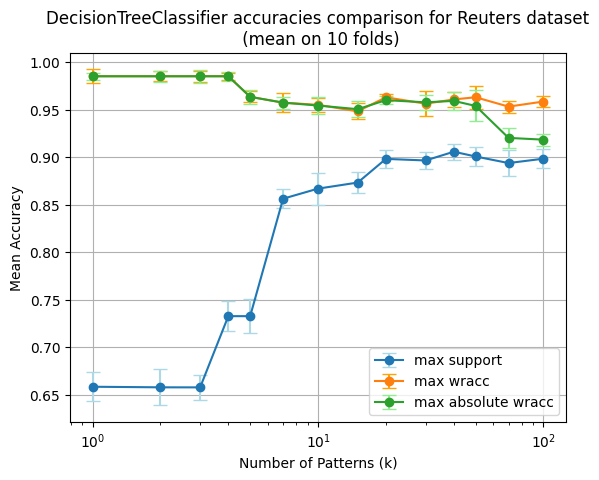

In [ ]:
import matplotlib.pyplot as plt




# Plot accuracy as a function of k with error bars
plt.errorbar(labels, acc["sup"], yerr = np.array(std["sup"])/2, fmt='o-', ecolor='lightblue', capsize=5, label='max support' )
plt.errorbar(labels, acc["wracc"], yerr = np.array(std["wracc"])/2,  fmt='o-', ecolor='orange', capsize=5,  label='max wracc', )
plt.errorbar(labels, acc["abswracc"], yerr = np.array(std["abswracc"])/2,  fmt='o-', ecolor='lightgreen', capsize=5,  label='max absolute wracc', )

plt.title('DecisionTreeClassifier accuracies comparison for Reuters dataset\n (mean on 10 folds)')
plt.xscale('log')
plt.xlabel('Number of Patterns (k)')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)
#plt.savefig("Protein_dataset_accuracy.png")
plt.show()



# Sequential Covering Algorithm

In [6]:


def remove_covered_transactions(dataset : Spade, pattern_cover, P):
    """
    Remove the transactions covered by the pattern
    :param dataset: Spade object
    :param pattern: pattern
    :return: Spade object
    """
    remaining_transactions = copy.copy(dataset)

    patt_text = list(pattern_cover.keys())[0]
    trans_to_remove = pattern_cover[patt_text]

    # Remove the positive transactions covered by the pattern
    p = sum([trans<P for trans in trans_to_remove])
    n = len(trans_to_remove) - p


    if p>0:
        filtered_pos_transactions_cover = {}
        filtered_pos_transactions_repr = {}
        for key, value in remaining_transactions.pos_transactions_cover.items():
            filtered_trans = value - trans_to_remove

            if filtered_trans:
                filtered_pos_transactions_cover[key] = filtered_trans
                filtered_pos_transactions_repr[key] = {key: value for key, value in remaining_transactions.pos_transactions_repr[key].items()
                                                       if key in filtered_trans}

        remaining_transactions.pos_transactions_cover = filtered_pos_transactions_cover
        remaining_transactions.pos_transactions_repr = filtered_pos_transactions_repr

        # Update the number of transactions
        remaining_transactions.nb_pos -= p

    # Remove the negative transactions covered by the pattern
    if n>0:
        filtered_neg_transactions_cover = {}
        filtered_neg_transactions_repr = {}
        for key, value in remaining_transactions.neg_transactions_cover.items():
            filtered_trans = value - trans_to_remove

            if filtered_trans:
                filtered_neg_transactions_cover[key] = filtered_trans
                filtered_neg_transactions_repr[key] = {key: value for key, value in remaining_transactions.neg_transactions_repr[key].items() if key in filtered_trans}

        remaining_transactions.neg_transactions_cover = filtered_neg_transactions_cover
        remaining_transactions.neg_transactions_repr = filtered_neg_transactions_repr

        # Update the number of transactions
        remaining_transactions.nb_neg -= n

    return remaining_transactions




def SequentialCoveringAlgorithm(dataset : Spade, k, patterns_rules):
    """
    Sequential Covering Algorithm
    :param dataset: list of transactions
    :param k: number of patterns to be mined
    :param metric: metric to be used to evaluate the patterns
    :param min_support: minimum support threshold
    :return: list of patterns
    """
    remaining_transactions = dataset
    print(len(remaining_transactions.neg_transactions_cover), len(remaining_transactions.pos_transactions_cover))

    for i in range(k):
        # Find the best pattern
        best_pattern = remaining_transactions.min_top_k("abswracc")[0]

        patterns_text = list(best_pattern.keys())[-1]

        # Remove the transactions covered by the best pattern and store the rule
        remaining_transactions = remove_covered_transactions(remaining_transactions, best_pattern, dataset.nb_pos)
        patterns_rules[i] = patterns_text
        print(len(remaining_transactions.neg_transactions_cover), len(remaining_transactions.pos_transactions_cover))

        if remaining_transactions.nb_pos <= 0 or remaining_transactions.nb_neg <= 0:
            print("No more transactions to mine")
            break

    return patterns_rules




In [18]:


nb_folds = 10

pos_filepath = "datasets/Protein/PKA_group15.txt"
neg_filepath = "datasets/Protein/SRC1521.txt"

# pos_filepath = "datasets/Reuters_small/acq_small.txt"
# neg_filepath = "datasets/Reuters_small/earn_small.txt"


s = Spade(pos_filepath, neg_filepath, 1)
D = s.D
min_neg_trans_id = s.nb_pos

patterns_rules = {}
patterns = SequentialCoveringAlgorithm(s, 100, patterns_rules)
list_patterns = []

k= []
acc = []
std=[]
for i in range(len(patterns)):
    list_patterns.append(patterns[i])
    best_patterns={}
    for j in list_patterns:
        best_patterns.update({j:D[j]})
    # print(best_patterns)

    X, y, nb_pos, nb_neg  = convert_dict_to_np_array(best_patterns, min_neg_trans_id)

    model = tree.DecisionTreeClassifier(random_state=1)
    (a, s) = evaluate_accuracies(X, y, model, nb_folds)
    k.append(i)
    acc.append(a)
    std.append(s)
    print(i+1, a, s)

20 20
0 19
No more transactions to mine
1 0.7599883855981416 0.07273622904437053


C:\Users\pietr\AppData\Local\Temp\ipykernel_17168\3115419285.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')


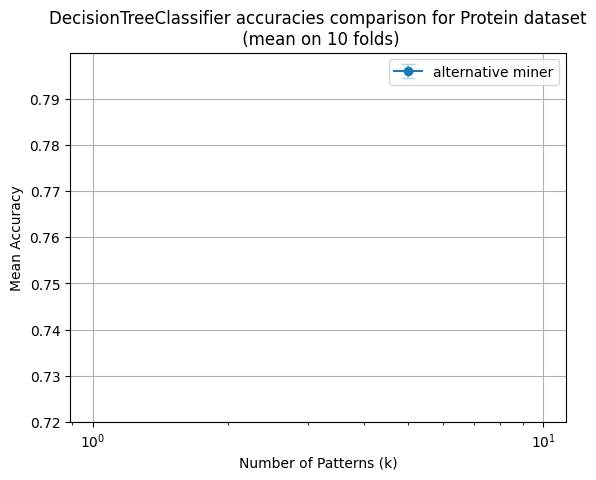

In [19]:
import matplotlib.pyplot as plt
plt.errorbar(k, acc, yerr = np.array(std)/2,  fmt='o-', ecolor='lightblue', capsize=5,  label='alternative miner' )

plt.title('DecisionTreeClassifier accuracies comparison for Protein dataset\n (mean on 10 folds)')
plt.xscale('log')
plt.xlabel('Number of Patterns (k)')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)
#plt.savefig("Protein_dataset_accuracy.png")
plt.show()